In [1]:
#Dataset downloaded from https://www.kaggle.com/datasets/sachinpatel21/az-handwritten-alphabets-in-csv-format?resource=download

In [18]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2

In [19]:
handwritten_data = pd.read_csv("../data/Handwritten Data.csv")

In [20]:
handwritten_data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372446,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372447,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372448,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
handwritten_data['0'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

The column '0' as you can see contains labels from 0 to 25. 0 being 'A' and 25 being 'Z'

Let us now create a dictionary to refer the numbers to their respective alphabets

In [21]:
import string

alphabets = string.ascii_uppercase
dict={}
for i in range (0,len(alphabets)):
    dict[i] = alphabets[i]

In [7]:
dict

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [8]:
handwritten_data['Letter']=handwritten_data['0']

In [9]:
handwritten_data['Letter']=handwritten_data['Letter'].replace(dict)

Splitting the data

In [10]:
handwritten_data['Letter'].value_counts()

O    57825
S    48419
U    29008
C    23409
T    22495
P    19341
N    19010
A    13869
M    12336
L    11586
R    11566
E    11440
Y    10859
W    10784
D    10134
B     8668
J     8493
H     7218
X     6272
Z     6076
Q     5812
G     5762
K     5603
V     4182
F     1163
I     1120
Name: Letter, dtype: int64

<AxesSubplot:>

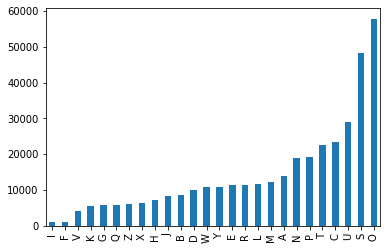

In [11]:
handwritten_data['Letter'].value_counts().sort_values().plot(kind = 'bar')

In [22]:
X = handwritten_data.drop('0',axis = 1)
y = handwritten_data['0']

#### Converting the data to image to display the images
The images of various alphabets were combined and converted to a csv file which we are using as input. In the file they are present in 784 columns (i.e., 784 pixels), now we reshape it into 28 * 28 pixels.

In [23]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)
train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))

In [24]:
print("Training data: ", train_x.shape)
print("Testing data: ", test_x.shape)

Training data:  (297960, 28, 28)
Testing data:  (74490, 28, 28)


Let us now print few of the test set hand written letters 

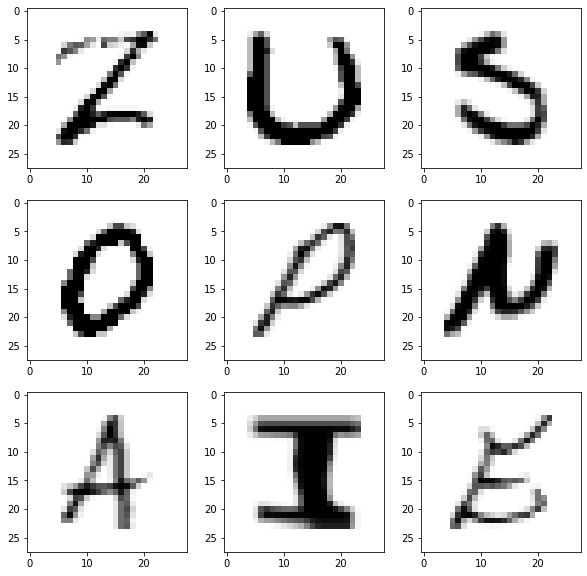

In [25]:
shuff = shuffle(train_x[:200])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

#### Converting the data back to flat format to train the model

In [26]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)

Converting all the labels to its respective categorical value to make them ready for CNN input

In [27]:
from tensorflow.keras.utils import to_categorical
train_y_categorical = to_categorical(train_y, num_classes = 26, dtype='int')
test_y_categorical  = to_categorical(test_y, num_classes = 26, dtype='int')

In [28]:
print("New shape of train labels: ", train_y_categorical.shape)
print("New shape of test labels: ", test_y_categorical.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


### Convolutional Neural Networks

In [29]:
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))

model.add(Dense(26,activation ="softmax"))



model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history = model.fit(train_X, train_y_categorical, epochs=1, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_y_categorical))


2022-04-20 20:50:24.405196: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


9312/9312 [==============================] - 282s 30ms/step - loss: 0.1550 - accuracy: 0.9572 - val_loss: 0.0877 - val_accuracy: 0.9759 - lr: 0.0010


#### Making predictions

In [30]:
pred = model.predict(test_X[:9])

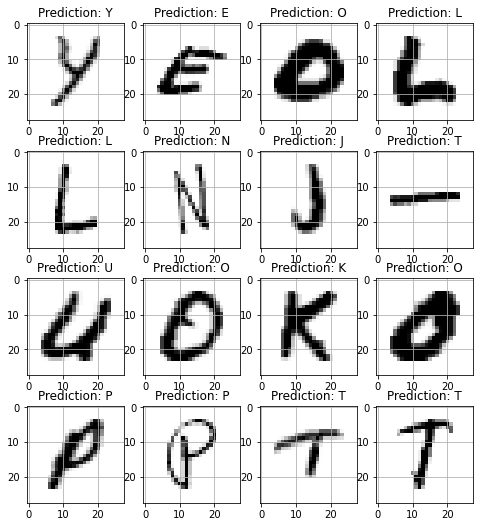

In [31]:
fig, axes = plt.subplots(4,4, figsize=(8,9))
axes = axes.flatten()
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    pred = dict[np.argmax(test_y_categorical[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

In [ ]:
test_y = pd.DataFrame(test_y)
test_y = test_y.reset_index(drop=True)

In [ ]:
y_test = []
for i in range(len(test_y)):
    y_test.append(dict[test_y['0'][i]])

In [ ]:
y_pred = []
for i in range(test_y_categorical.shape[0]):
    y_pred.append(dict[np.argmax(test_y_categorical[i])])

Accurcay is :  1.0
Precision is :  1.0


In [ ]:
model.save(r'guess_the_letter_model.h5')

Trying with user input

In [ ]:
img = cv2.imread(r'A.png')
#print(img.shape)
img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400,440))

img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28,28))
img_final =np.reshape(img_final, (1,28,28,1))


img_pred = dict[np.argmax(model.predict(img_final))]

In [ ]:
img_pred

In [ ]:
from keras.models import load_model
from tkinter import *
import tkinter as tk
from PIL import ImageGrab, Image
import numpy as np
model = load_model('guess_the_letter_model.h5')
def predict_digit(img):
    
    #resize image to 28x28 pixels
    #img = img.resize((28,28))
    #img = np.array(img)
    #print(img.shape)
    #print(img)
    #convert rgb to grayscale
    img_copy = img.copy()
    img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)
    #img = img.convert('L')
    #img = np.array(img)
    
    #reshaping to support our model input and normalizing
    img = cv2.resize(img, (400,440))
    img_copy = cv2.GaussianBlur(np.array(img_copy), (7,7), 0)
    img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    _, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)
    img_final = cv2.resize(img_thresh, (28,28))
    img_final =np.reshape(img_final, (1,28,28,1))
    #img = img.reshape(1,28,28,1)
    #img = img/255.0
    
    #predicting the class
    res = dict[np.argmax(model.predict(img_final))]
    print(res)
    return "I am"

class App(tk.Tk):
    def __init__(self):
        tk.Tk.__init__(self)
        self.x = self.y = 0
        # Creating elements
        self.canvas = tk.Canvas(self, width=300, height=300, bg = "white", cursor="cross")
        self.label = tk.Label(self, text="Thinking..", font=("Helvetica", 48))
        self.classify_btn = tk.Button(self, text = "Recognise", command = self.classify_handwriting) 
        self.button_clear = tk.Button(self, text = "Clear", command = self.clear_all)
        # Grid structure
        self.canvas.grid(row=0, column=0, pady=2, sticky=W, )
        self.label.grid(row=0, column=1,pady=2, padx=2)
        self.classify_btn.grid(row=1, column=1, pady=2, padx=2)
        self.button_clear.grid(row=1, column=0, pady=2)
        #self.canvas.bind("<Motion>", self.start_pos)
        self.canvas.bind("<B1-Motion>", self.draw_lines)
    def clear_all(self):
        self.canvas.delete("all")
    def classify_handwriting(self):
        #HWND = self.canvas.winfo_id() # get the handle of the canvas
        #rect = win32gui.GetWindowRect(HWND) # get the coordinate of the canvas
        x, y = (self.canvas.winfo_rootx(), self.canvas.winfo_rooty())
        width, height = (self.canvas.winfo_width(), self.canvas.winfo_height())
        a, b, c, d = (x, y, x+width, y+height)
        rect = (a, b, c, d)
        im = ImageGrab.grab(rect)
        im.save('Output.png')
        digit = predict_digit(im)
        self.label.configure(text= str(digit))
    def draw_lines(self, event):
        self.x = event.x
        self.y = event.y
        r=8
        self.canvas.create_oval(self.x-r, self.y-r, self.x + r, self.y + r, fill='black')
app = App()
mainloop()